# 외부 데이터 처리

1. 공공데이터나 오픈된 데이터를 파일로 다운 받아서 사용(csv, 엑셀, xml, json...)  
2. 웹 페이지를 읽어서 데이터 분석(그 웹 페이지 구조를 분석해야함)  


In [1]:
#pip install requests
import requests
html = requests.get('https://google.com').text  #웹 요청
html

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="z5vTrEJT3Vu8ZXiSlYt19Q==">(function(){window.google={kEI:\'zn7eYLCcCdiSr7wPno68-A8\',kEXPI:\'0,772215,1,530320,56873,954,5105,206,4804,2316,383,246,5,1353,4043,1208,16232,10,1106274,1197774,508,83,328852,51273,16115,17444,1953,9287,17572,4859,1361,9291,3024,17584,4020,978,13228,2676,1171,4192,6430,14528,4516,2778,920,5080,887,706,1279,2212,530,149,1103,840,2196,4101,3514,606,2023,1777,520,14670,3227,2845,7,12354,5096,7539,337,5037,2855,552,908,2,940,2615,13142,3,346,230,6460,148,13975,4,1528,2304,1236,5803,4683,2015,4067,14308,2658,4243,2458,654,32,13628,2307,636,7080,10535,665,2521,3303,2533,992,3102,20,2238,880,6,908,3,3541,1,14261,449,1814,283,912,5992,6754,984,4788,2,1394,1389,1417,1715,2,3057,2017,521

In [2]:
#pip install beautifulsoup4
from bs4 import BeautifulSoup

In [3]:
content = BeautifulSoup(html, 'html.parser')  #html소스를 돔 객체화 
title = content.html.head.title    #소스에서 title 태그 추출
print(title.string)  #string:태그의 텍스트 값 <태그>텍스트</태그>

Google


태그 접근 방법  
1. root.html.body.h1 : 태그 한개 검색  
2. root.find(태그[속성]): 태그 1개 검색  
3. root.find_all(태그[속성]): 태그 모두 검색  
4. root.select(태그): 태그 모두 검색

In [4]:
#link = content.html.body.a  #처음 a 태그 하나만 추출
links = content.find_all('a')
links

[<a class="gb1" href="https://www.google.co.kr/imghp?hl=ko&amp;tab=wi">이미지</a>,
 <a class="gb1" href="https://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a>,
 <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?gl=KR&amp;tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a>,
 <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</a>,
 <a class="gb4" href="http://www.google.co.kr/history/optout?hl=ko">웹 기록</a>,
 <a class="gb4" href="/preferences?hl=ko">설정</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">로그인</a>,
 <a href="/advanced_search?hl=ko&amp;authuser=0">고급검색</a>,
 <a 

In [5]:
for i in links:
    print(i.get_text(), ':', i['href'])#속성값 읽기

이미지 : https://www.google.co.kr/imghp?hl=ko&tab=wi
지도 : https://maps.google.co.kr/maps?hl=ko&tab=wl
Play : https://play.google.com/?hl=ko&tab=w8
YouTube : https://www.youtube.com/?gl=KR&tab=w1
뉴스 : https://news.google.com/?tab=wn
Gmail : https://mail.google.com/mail/?tab=wm
드라이브 : https://drive.google.com/?tab=wo
더보기 » : https://www.google.co.kr/intl/ko/about/products?tab=wh
웹 기록 : http://www.google.co.kr/history/optout?hl=ko
설정 : /preferences?hl=ko
로그인 : https://accounts.google.com/ServiceLogin?hl=ko&passive=true&continue=https://www.google.com/&ec=GAZAAQ
고급검색 : /advanced_search?hl=ko&authuser=0
광고 프로그램 : /intl/ko/ads/
비즈니스 솔루션 : http://www.google.co.kr/intl/ko/services/
Google 정보 : /intl/ko/about.html
Google.co.kr : https://www.google.com/setprefdomain?prefdom=KR&prev=https://www.google.co.kr/&sig=K_2QTXjmi4ROkFkO2kPbc0I025oos%3D
개인정보처리방침 : /intl/ko/policies/privacy/
약관 : /intl/ko/policies/terms/


In [6]:
html = '<html>'
html += '<body>'
html += '<p class=a>aaa</p>'
html += '<p class=b>bbb</p>'
html += '<p class=a>ccc</p>'
html += '<p class=a id=xxx>ddd</p>'
html += '</body>'
html += '</html>'

root = BeautifulSoup(html, 'html.parser') 
p1 = root.find_all('p')
print('p1:', p1)
p2 = root.find_all('p', {'class':'a'})
print('p2:', p2)
p3 = root.find_all('p', {'class':'b'})
print('p3:', p3)
p4 = root.find('p', {'class':'a', 'id':'xxx'})
print('p4:', p4)
p5 = root.select('p')
print('p5:', p5)
p6 = root.select('p.a')#태그.클래스명 //태그#id명
print('p6:', p6)
p7 = root.select('p.b')
print('p7:', p7)
p8 = root.select('p#xxx')
print('p8:', p8)

p1: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p2: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p3: [<p class="b">bbb</p>]
p4: <p class="a" id="xxx">ddd</p>
p5: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p6: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p7: [<p class="b">bbb</p>]
p8: [<p class="a" id="xxx">ddd</p>]


In [13]:
url = 'https://ent.sbs.co.kr/news/flash.do?plink=GNB&cooper=SBSENTERNEWS'
html = requests.get(url).text  
root = BeautifulSoup(html, 'html.parser') 
divs = root.select('div.w_nwl_text')#기사 div 태그들만 추출
for i in divs:
    title = i.find('h3').text
    print('title:', title)
    #select는 여러개검색하는 함수이므로 반환타입이 []리스트다
    text = i.select('div.nwl_text')[0].text  
    print('text:', text)
    writer = i.select('em.nwl_reporter')[0].text
    print('writer:', writer)
    time = i.select('div.nwl_subtext')[0].text
    print('time:', time)
    print('====================')

title: 문채원, '미우새' MC들의 짓궂은 상황극에 "나 약올려?"
text: 배우 문채원의 사랑스럽고 솔직한 매력이 이어진다. 오는 4일 방송될 SBS '미운 우리 새끼'에서는 지난주 '애교의 정석'을 보여준 스페셜MC 문채원의 출연이 계속된다. 앞서 진행된 촬영에서 문채원은 '만약 배우자가 같은 배우라면, 뽀뽀, 포옹, 키스 등의 애정신 중 어디까지 허락할 수 있냐'는 질문에 심사숙고 끝에 하나를 골라 대답했다.
writer: 강선애 기자
time: 2021.07.02 12:48
title: '오스카 노미네이트' 에릭 오, 美 아카데미 회원 되다
text: 올해 아카데미 단편 애니메이션상 최종 후보에 화제를 모은 에릭 오가 아카데미의 정식 신입 회원이 되었다. 다수의 외신 매체는 현지시간 1일 아카데미 시상식을 주최하는 AMPAS가 올해 아카데미 신입 회원이 된 395명의 명단을 발표했다는 소식을 전했다.
writer: 김지혜 기자
time: 2021.07.02 12:48
title: '언더커버' 김동호, '창애' 주인공 캐스팅…BIFAN 경쟁부문 초청
text: 배우 김동호가 제25회 부천국제판타스틱영화제 경쟁부문 초청작 '창애'에 주인공으로 스크린에 컴백한다. 김동호의 소속사 이니셜 엔터테인먼트는 2일 이같은 소식을 전하며 "김동호가 영화 '창애'에서 카페 사장 기영 역을 맡아 주연으로 활약한다"고 밝혔다.
writer: 김지혜 기자
time: 2021.07.02 12:46
title: [펀펀한 현장] 티아라, '다시 한자리에...완전체 등굣길'
text: 그룹 티아라가 1일 오후 경기도 고양시 JTBC 일산에서 진행된 '아는 형님' 녹화에 참석하기 위해 방송국으로 들어서며 포즈를 취하고 있다. 걸그룹 티아라가 4인 완전체로 다시 뭉쳤다.
writer: 백승철 기자
time: 2021.07.02 12:46
title: "방화인가 자연발화인가"…'그것이 알고싶다', 석란정 화재 진실 추적
text: SBS '그것이 알고 싶다'가 소방관 두 명의 안타

In [14]:
html = requests.get('http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp').text  #웹 요청
#html=html.decode('utf-8')
#지역별 일간 날씨를 출력
root = BeautifulSoup(html, 'html.parser') 
loc = root.find_all('location')
for i in loc:
    print(i.city.get_text(), '지역 날씨========')
    d = i.find_all('data')
    for j in d:
        print(j.tmef.string , ':', j.wf.string, ' / 최저온도:', j.tmn.string, ' / 최고온도:', j.tmx.string, ' / 습도:',j.rnst.string,'%')
        

서울 지역 날씨========
2021-07-05 00:00 : 구름많음  / 최저온도: 22  / 최고온도: 29  / 습도: 30 %
2021-07-05 12:00 : 흐림  / 최저온도: 22  / 최고온도: 29  / 습도: 40 %
2021-07-06 00:00 : 구름많음  / 최저온도: 22  / 최고온도: 28  / 습도: 30 %
2021-07-06 12:00 : 흐림  / 최저온도: 22  / 최고온도: 28  / 습도: 40 %
2021-07-07 00:00 : 흐림  / 최저온도: 22  / 최고온도: 29  / 습도: 40 %
2021-07-07 12:00 : 흐림  / 최저온도: 22  / 최고온도: 29  / 습도: 40 %
2021-07-08 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 70 %
2021-07-08 12:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 70 %
2021-07-09 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 29  / 습도: 60 %
2021-07-09 12:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 29  / 습도: 70 %
2021-07-10 00:00 : 흐림  / 최저온도: 22  / 최고온도: 29  / 습도: 40 %
2021-07-11 00:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 80 %
2021-07-12 00:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 70 %
인천 지역 날씨========
2021-07-05 00:00 : 구름많음  / 최저온도: 21  / 최고온도: 27  / 습도: 30 %
2021-07-05 12:00 : 흐림  / 최저온도: 21  / 최고온도: 27  / 습도: 40 %
2021-07-06 00:00 : 구름많음  / 최저온도: 22  / 최고온도: 28  / 습도: 30 %
2021-07-06 1

2021-07-07 12:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 80 %
2021-07-08 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 29  / 습도: 90 %
2021-07-08 12:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 29  / 습도: 90 %
2021-07-09 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 90 %
2021-07-09 12:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 90 %
2021-07-10 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 80 %
2021-07-11 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 70 %
2021-07-12 00:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 29  / 습도: 60 %
홍성 지역 날씨========
2021-07-05 00:00 : 흐림  / 최저온도: 20  / 최고온도: 29  / 습도: 40 %
2021-07-05 12:00 : 흐림  / 최저온도: 20  / 최고온도: 29  / 습도: 40 %
2021-07-06 00:00 : 흐림  / 최저온도: 22  / 최고온도: 26  / 습도: 40 %
2021-07-06 12:00 : 흐림  / 최저온도: 22  / 최고온도: 26  / 습도: 40 %
2021-07-07 00:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 27  / 습도: 80 %
2021-07-07 12:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 27  / 습도: 80 %
2021-07-08 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 90 %
2021-07-08 12:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 28  / 습도: 90 %
2021-07-09 00:00 : 

2021-07-08 12:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 90 %
2021-07-09 00:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 80 %
2021-07-09 12:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 90 %
2021-07-10 00:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 80 %
2021-07-11 00:00 : 흐리고 비  / 최저온도: 23  / 최고온도: 28  / 습도: 80 %
2021-07-12 00:00 : 흐림  / 최저온도: 24  / 최고온도: 28  / 습도: 40 %
무주 지역 날씨========
2021-07-05 00:00 : 흐림  / 최저온도: 20  / 최고온도: 29  / 습도: 40 %
2021-07-05 12:00 : 흐림  / 최저온도: 20  / 최고온도: 29  / 습도: 40 %
2021-07-06 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 26  / 습도: 80 %
2021-07-06 12:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 26  / 습도: 80 %
2021-07-07 00:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 29  / 습도: 80 %
2021-07-07 12:00 : 흐리고 비  / 최저온도: 22  / 최고온도: 29  / 습도: 80 %
2021-07-08 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 28  / 습도: 90 %
2021-07-08 12:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 28  / 습도: 90 %
2021-07-09 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 28  / 습도: 80 %
2021-07-09 12:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 28  / 습도: 90 %
2021-07-10 00:00

2021-07-05 00:00 : 흐림  / 최저온도: 20  / 최고온도: 25  / 습도: 40 %
2021-07-05 12:00 : 흐림  / 최저온도: 20  / 최고온도: 25  / 습도: 40 %
2021-07-06 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 80 %
2021-07-06 12:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 80 %
2021-07-07 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 80 %
2021-07-07 12:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 80 %
2021-07-08 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 90 %
2021-07-08 12:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 80 %
2021-07-09 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 80 %
2021-07-09 12:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 70 %
2021-07-10 00:00 : 흐리고 비  / 최저온도: 21  / 최고온도: 25  / 습도: 80 %
2021-07-11 00:00 : 흐림  / 최저온도: 22  / 최고온도: 26  / 습도: 40 %
2021-07-12 00:00 : 흐림  / 최저온도: 21  / 최고온도: 26  / 습도: 40 %
울릉도 지역 날씨========
2021-07-05 00:00 : 흐림  / 최저온도: 20  / 최고온도: 24  / 습도: 40 %
2021-07-05 12:00 : 흐림  / 최저온도: 20  / 최고온도: 24  / 습도: 40 %
2021-07-06 00:00 : 흐리고 비  / 최저온도: 20  / 최고온도: 24  / 습도: 80 %
2021-07-06 12:00 : 흐리고 비

In [15]:
import json
j = '[{"id":"aaa", "pwd":"111"},{"id":"bbb", "pwd":"222"}]'#json 데이터

items = json.loads(j)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print(item['id'], ':', item['pwd'])

aaa : 111
bbb : 222


In [24]:
j = '['
j += '{"info":{"id":"aaa", "pwd":"111"}, "colors":["red", "blue", "yellow"]},'
j += '{"info":{"id":"bbb", "pwd":"222"}, "colors":["red2", "blue2", "yellow2"]}'
j += ']'

items = json.loads(j)
for item in items:
    info = item['info']
    arr = item['colors']
    print(info['id'], ' / ', info['pwd'])
    for a in arr:
        print(a, end=', ')
    print()

aaa  /  111
red, blue, yellow, 
bbb  /  222
red2, blue2, yellow2, 


In [37]:
html = requests.get('https://api.github.com/repositories').text
items = json.loads(html)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print('id:', item['id'], ' / ', 'name:', item['name'], ' / ', 'login:', item['owner']['login'])

id: 1  /  name: grit  /  login: mojombo
id: 26  /  name: merb-core  /  login: wycats
id: 27  /  name: rubinius  /  login: rubinius
id: 28  /  name: god  /  login: mojombo
id: 29  /  name: jsawesome  /  login: vanpelt
id: 31  /  name: jspec  /  login: wycats
id: 35  /  name: exception_logger  /  login: defunkt
id: 36  /  name: ambition  /  login: defunkt
id: 42  /  name: restful-authentication  /  login: technoweenie
id: 43  /  name: attachment_fu  /  login: technoweenie
id: 48  /  name: microsis  /  login: caged
id: 52  /  name: s3  /  login: anotherjesse
id: 53  /  name: taboo  /  login: anotherjesse
id: 54  /  name: foxtracs  /  login: anotherjesse
id: 56  /  name: fotomatic  /  login: anotherjesse
id: 61  /  name: glowstick  /  login: mojombo
id: 63  /  name: starling  /  login: defunkt
id: 65  /  name: merb-more  /  login: wycats
id: 68  /  name: thin  /  login: macournoyer
id: 71  /  name: resource_controller  /  login: jamesgolick
id: 73  /  name: markaby  /  login: jamesgolick
i

pd.read_html(url): url로 지정한 웹 페이지에서 테이블<table>을 전체를 읽어서 데이터 프레임으로 변환

In [6]:
#pip install lxml
import pandas as pd

def get_code(name):
    a = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', index_col='회사명')[0]
    code = a.loc[name, '종목코드']
    code = '{:0=6d}'.format(code)
    return code
                

In [2]:
code=get_code('효성')
code

'004800'

In [20]:
#pip install html5lib
import pandas as pd
url = 'ww.html'
a = pd.read_html(url)[0]
a

,A,B,C
0,aaa,bbb,ccc
1,qqq,www,ggg


In [24]:
import requests
import pandas as pd
url = 'https://finance.naver.com/item/sise_day.nhn?code=004800'

html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
a = pd.read_html(html)[0]
a = a.dropna()#NAN 줄 제거
a

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.07.02,105500.0,1000.0,107500.0,110000.0,104500.0,94890.0
2,2021.07.01,106500.0,3500.0,103000.0,111000.0,103000.0,271629.0
3,2021.06.30,103000.0,500.0,103000.0,104000.0,102500.0,42678.0
4,2021.06.29,102500.0,1000.0,103500.0,103500.0,102000.0,41228.0
5,2021.06.28,103500.0,0.0,103500.0,104000.0,102000.0,41960.0
9,2021.06.25,103500.0,1000.0,102500.0,103500.0,101500.0,54892.0
10,2021.06.24,102500.0,1000.0,101500.0,102500.0,101000.0,45367.0
11,2021.06.23,101500.0,1500.0,104000.0,105500.0,101500.0,105411.0
12,2021.06.22,103000.0,3000.0,101500.0,103500.0,100000.0,71271.0
13,2021.06.21,100000.0,1500.0,101000.0,101500.0,99500.0,59150.0


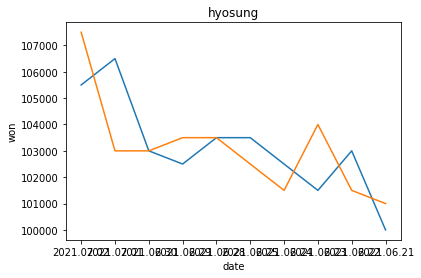

In [26]:
import matplotlib.pyplot as plt

plt.plot(a['날짜'], a['종가'])
plt.plot(a['날짜'], a['시가'])
plt.title('hyosung')
plt.xlabel('date')
plt.ylabel('won')
plt.show()


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as tk

x=np.arange(1, 10, 1)
y=2*x**2
fig = Figure(figsize=(10, 7), dpi=100)  #그리프 그릴 창 생성
fig.add_subplot(1,1,1).plot(x, y)#창에 그래프 하나 추가

window = tk.Tk()  #Tk 객체 생성. 기본 윈도우 객체
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()
window.mainloop()
